<a href="https://colab.research.google.com/github/JuanCVanegas/Practical_Cases/blob/main/Click_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outline

### Company Name:
Online Company

### Problem Type:
Click on Ad Prediction

### Business Problem:
Determine the optimal customer profiles for ad targeting, empowering the marketing team to enhance KPIs by showing ads to the most relevant audience.

### Business Goal:
Provide support in prioritizing the target audience to enhance ad conversion rates and drive improvements in marketing campaign performance.

# Import Main Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

# Setting seaborn color palette
palette = sns.set_palette('bright')

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')
data = pd.read_csv('advertising.csv')

Mounted at /content/drive


# Exploratory Analysis and Visualization

In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<Axes: xlabel='Age', ylabel='Count'>

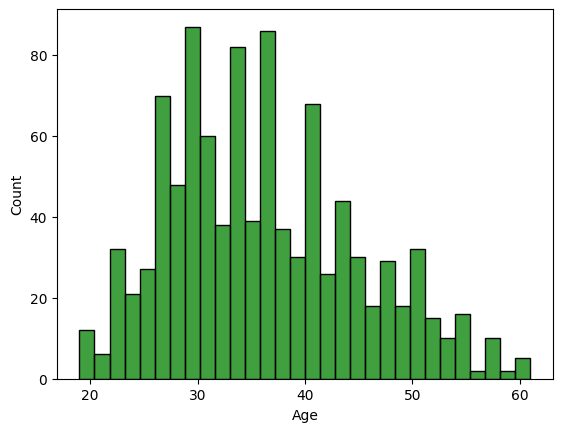

In [ ]:
sns.histplot(x="Age", data=data, bins=30, color = 'green')

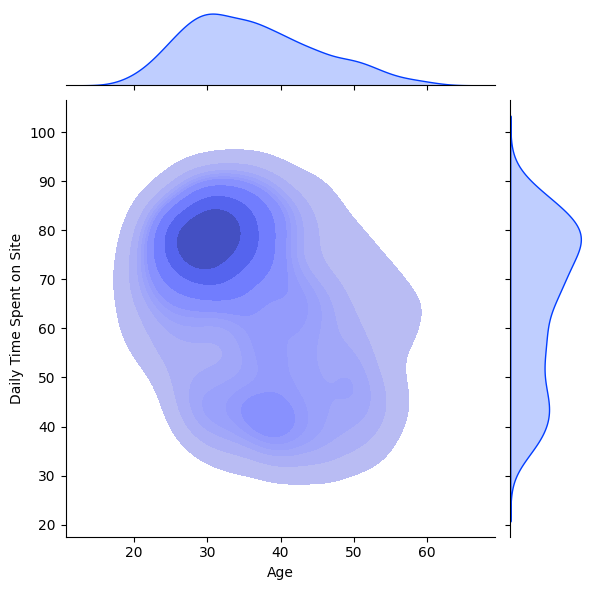

In [ ]:
sns.jointplot(x="Age", y="Daily Time Spent on Site", data=data, kind="kde", fill=True)

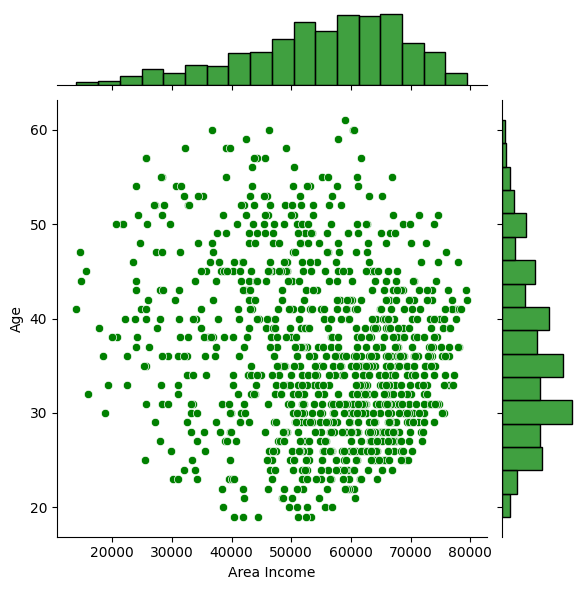

In [ ]:
sns.jointplot(x="Area Income", y="Age", data=data, color = 'green')

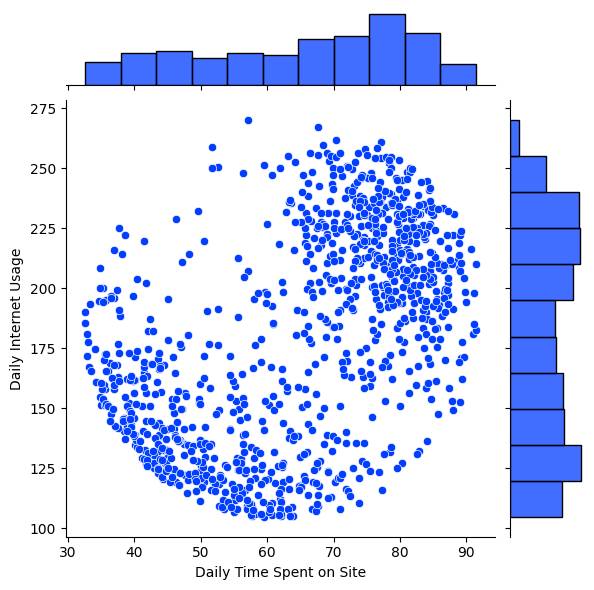

In [ ]:
sns.jointplot(x="Daily Time Spent on Site", y="Daily Internet Usage", data=data)

<ipython-input-10-7141a08bc5ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True, fmt='1.2f')


<Axes: >

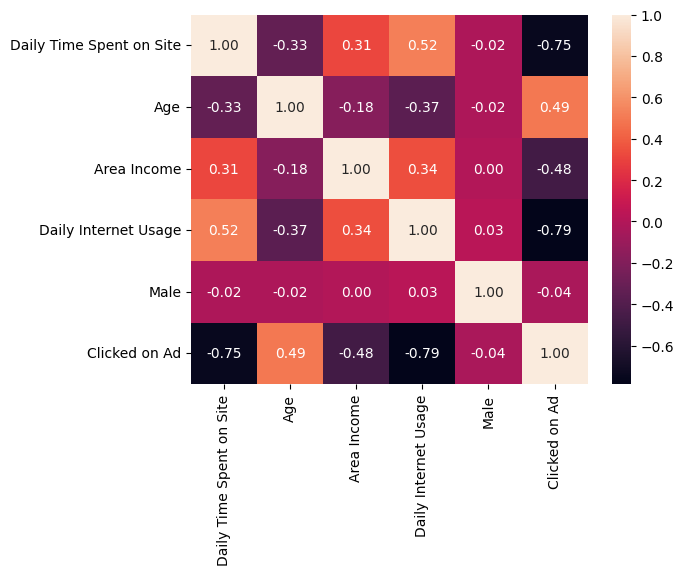

In [ ]:
sns.heatmap(data.corr(),annot=True, fmt='1.2f')

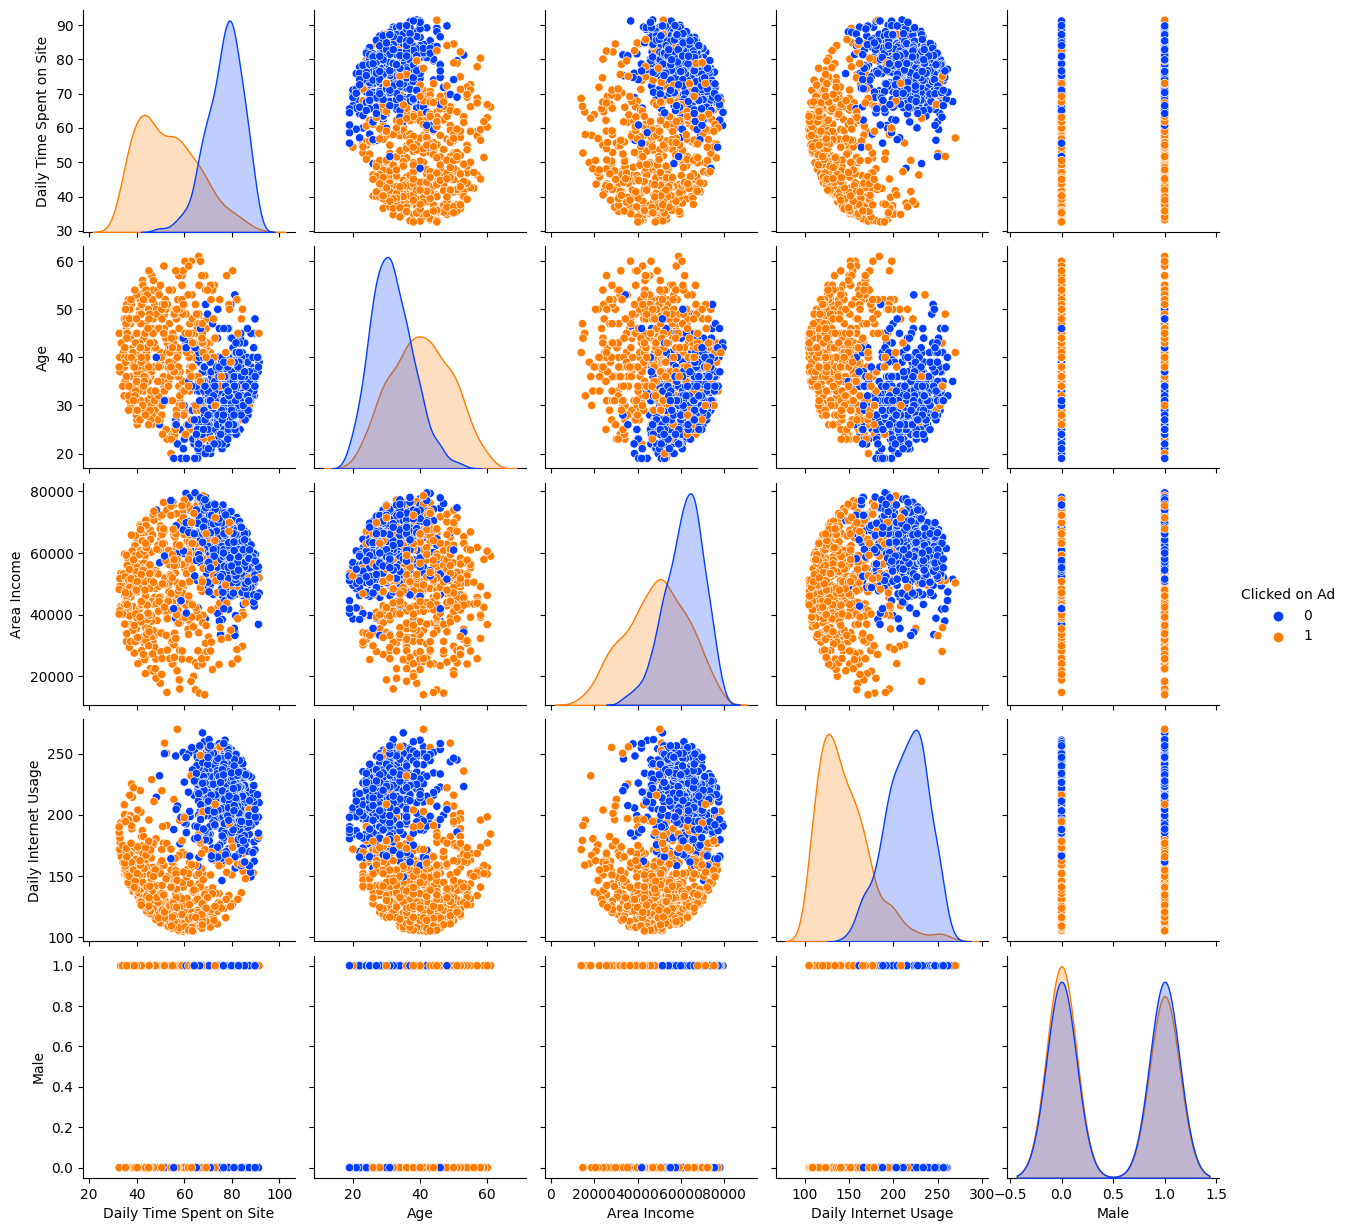

In [ ]:
sns.pairplot(data, hue="Clicked on Ad")

#Model Training and Evaluation

In [ ]:
pip install pycaret --ignore-installed llvmlite numba

In [ ]:
from pycaret.classification import *

In [ ]:
exp_clf = setup(data, target = 'Clicked on Ad',session_id = 1)

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9657,0.9932,0.9600,0.9715,0.9652,0.9314,0.9323,0.5850
ridge,Ridge Classifier,0.9543,0.0000,0.9200,0.9880,0.9521,0.9086,0.9117,0.4140
lr,Logistic Regression,0.9286,0.9728,0.9057,0.9505,0.9265,0.8571,0.8598,1.4040
knn,K Neighbors Classifier,0.6886,0.7506,0.6457,0.7050,0.6704,0.3771,0.3805,0.5900
et,Extra Trees Classifier,0.6286,0.8504,0.2829,0.9095,0.4160,0.2571,0.3484,0.5780
dt,Decision Tree Classifier,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4980
svm,SVM - Linear Kernel,0.5000,0.0000,0.5000,0.2500,0.3333,0.0000,0.0000,0.4370
rf,Random Forest Classifier,0.5000,0.9409,0.0000,0.0000,0.0000,0.0000,0.0000,0.7590
qda,Quadratic Discriminant Analysis,0.5000,0.5000,0.9000,0.4500,0.6000,0.0000,0.0000,0.4690
ada,Ada Boost Classifier,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4930


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Naive_Bayes = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9571,0.9951,0.9714,0.9444,0.9577,0.9143,0.9147
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9429,0.9878,0.8857,1.0000,0.9394,0.8857,0.8916
4,0.9714,0.9959,0.9714,0.9714,0.9714,0.9429,0.9429
5,0.9571,0.9976,0.9429,0.9706,0.9565,0.9143,0.9147
6,0.9857,1.0000,0.9714,1.0000,0.9855,0.9714,0.9718
7,0.8714,0.9567,0.8571,0.8824,0.8696,0.7429,0.7432
8,0.9714,0.9992,1.0000,0.9459,0.9722,0.9429,0.9444


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(Naive_Bayes)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
predict_model(Naive_Bayes)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9667,0.9816,0.9667,0.9667,0.9667,0.9333,0.9333


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,prediction_label,prediction_score
876,67.389999,44,51257.261719,107.190002,Realigned intermediate application,Josephberg,0,Armenia,2016-01-24 13:41:38,1,1,1.0000
314,84.290001,41,60638.378906,232.539993,Re-contextualized systemic time-frame,Jacksonmouth,0,Niue,2016-01-27 20:47:57,0,0,0.9994
909,75.239998,24,52252.910156,226.490005,Vision-oriented next generation solution,South Christopher,0,Vanuatu,2016-02-25 16:33:24,0,0,0.9991
656,85.239998,31,61840.261719,182.839996,Optional contextually-based flexibility,Harrisonmouth,1,Burkina Faso,2016-06-17 03:23:13,0,0,0.9931
778,52.669998,44,14775.500000,191.259995,Persevering 5thgeneration knowledge user,New Hollyberg,0,Jersey,2016-05-19 06:37:38,1,1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
2,69.470001,26,59785.941406,236.500000,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0,0.9994
360,38.910000,33,56369.738281,150.800003,Versatile reciprocal structure,Morrismouth,1,Philippines,2016-07-13 07:41:42,1,1,1.0000
759,85.730003,32,43778.878906,147.750000,Stand-alone radical throughput,New Tammy,1,Saudi Arabia,2016-07-10 17:24:51,1,1,0.7770
376,89.000000,37,52079.179688,222.259995,Devolved regional moderator,Jordanmouth,1,Cyprus,2016-01-26 15:56:55,0,0,0.9988
